**DATA LOADING AND INITIAL EXPLORATION
**

In [7]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w

#filtering warnings (if any)
w.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [8]:
import pandas as pd

df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:

# checking for number of rows and columns
print(f'Total number of records are {df.shape[0]}')
print(f'Total number of features are {df.shape[1]}')

Total number of records are 1025
Total number of features are 14


In [10]:
# checking the datatypes of all columns present
display(df.dtypes)

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [11]:
#checking the names of the columns present
display(df.columns.to_list())

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

<Axes: >

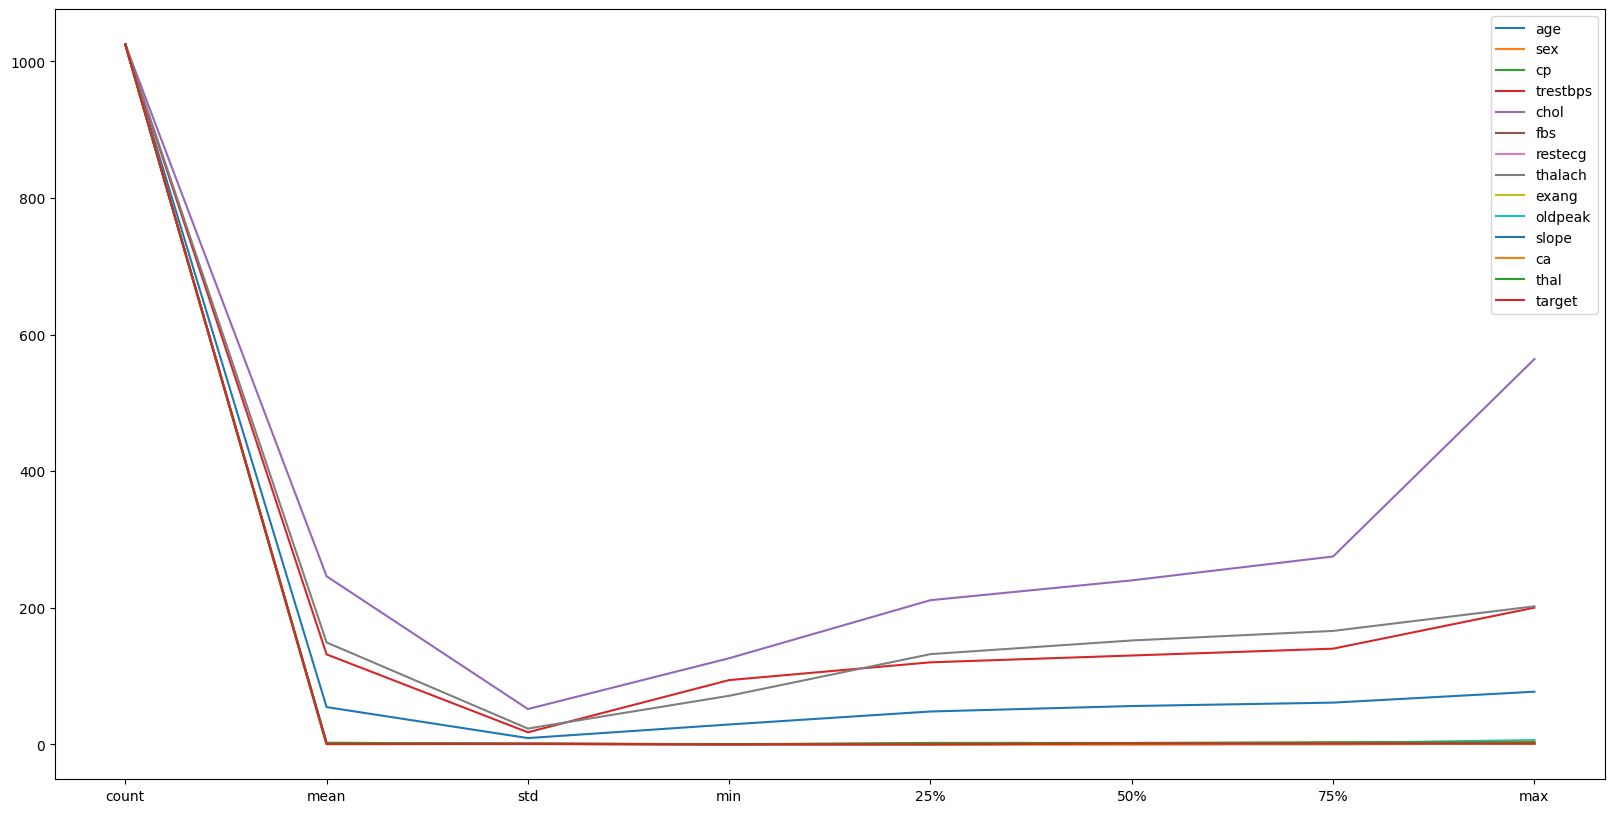

In [12]:
#describing the columns present
display(df.describe(include='all').plot(kind='line',figsize=(20,10)))

In [13]:
display(df.describe(include='all').T)


,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [14]:

#Checking for unique values
display(df.nunique())

,0
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [15]:
# checking information about all features
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

**DATA CLEANING**

In [16]:
#checking for duplicates
print(f'Total Duplicated Records present are : {df.duplicated().sum()}')

Total Duplicated Records present are : 723


In [17]:
#removing the duplicates
df.drop_duplicates(inplace=True)
print(f'Total Duplicated Records present are : {df.duplicated().sum()}')

Total Duplicated Records present are : 0


In [18]:

#checking for null values
display(df.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**EDA**

1. What is the average age of patients in the dataset?


In [19]:
# Calculate and display the average age
average_age = df['age'].mean()
print(f"The average age of patients in the dataset is: {average_age:.2f}")

The average age of patients in the dataset is: 54.42


2. What is the gender distribution of patients?


In [20]:

# Calculate and display the gender distribution
gender_distribution = df['sex'].value_counts()
print("Gender Distribution:")
print(gender_distribution)

Gender Distribution:
sex
1    206
0     96
Name: count, dtype: int64


3. What is the average resting blood pressure of patients?


In [21]:
# Calculate and display the average resting blood pressure
average_trestbps = df['trestbps'].mean()
print(f"The average resting blood pressure of patients is: {average_trestbps:.2f}")

The average resting blood pressure of patients is: 131.60


4. How many patients have fasting blood sugar levels higher than 120 mg/dl?


In [22]:
# Count patients with fasting blood sugar > 120 mg/dl
# The 'fbs' column is binary (0 or 1), where 1 indicates fbs > 120 mg/dl
high_fbs_count = df['fbs'].sum()
print(f"Number of patients with fasting blood sugar > 120 mg/dl: {high_fbs_count}")

Number of patients with fasting blood sugar > 120 mg/dl: 45


5. What are the different types of chest pain recorded in the dataset?


In [23]:

# Get the unique values in the 'cp' column
chest_pain_types = df['cp'].unique()
print("Different types of chest pain:")
print(chest_pain_types)

Different types of chest pain:
[0 1 2 3]


6. What is the maximum heart rate achieved by patients?


In [24]:

# Find the maximum value in the 'thalach' column
max_thalach = df['thalach'].max()
print(f"Maximum heart rate achieved by patients: {max_thalach}")

Maximum heart rate achieved by patients: 202


7. What percentage of patients experience exercise-induced angina?


In [25]:
# Calculate the percentage of patients with exercise-induced angina
# The 'exang' column is binary (0 or 1), where 1 indicates exercise-induced angina
exang_percentage = df['exang'].mean() * 100
print(f"Percentage of patients experiencing exercise-induced angina: {exang_percentage:.2f}%")

Percentage of patients experiencing exercise-induced angina: 32.78%


8. What is the average cholesterol level in the dataset?


In [26]:
# Calculate the average cholesterol level
average_chol = df['chol'].mean()
print(f"The average cholesterol level in the dataset is: {average_chol:.2f}")

The average cholesterol level in the dataset is: 246.50


9. How many patients have a probable or definite left ventricular hypertrophy based on their resting electrocardiographic results?


In [27]:
# Count patients with probable or definite left ventricular hypertrophy (restecg = 2)
# Assuming 'restecg' = 2 corresponds to probable or definite left ventricular hypertrophy
lvh_count = df['restecg'].value_counts().get(2, 0)
print(f"Number of patients with probable or definite left ventricular hypertrophy: {lvh_count}")

Number of patients with probable or definite left ventricular hypertrophy: 4


10. What is the distribution of the number of major vessels colored by fluoroscopy?


In [28]:
# Get the distribution of the number of major vessels colored by fluoroscopy ('ca')
ca_distribution = df['ca'].value_counts().sort_index()
print("Distribution of the number of major vessels colored by fluoroscopy:")
print(ca_distribution)

Distribution of the number of major vessels colored by fluoroscopy:
ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64


1. What is the correlation between age and cholesterol levels?


In [29]:
# Calculate the correlation between age and cholesterol
correlation_age_chol = df[['age', 'chol']].corr().iloc[0, 1]
print(f"The correlation between age and cholesterol levels is: {correlation_age_chol:.2f}")

The correlation between age and cholesterol levels is: 0.21


2. What is the distribution of chest pain types across different age groups?


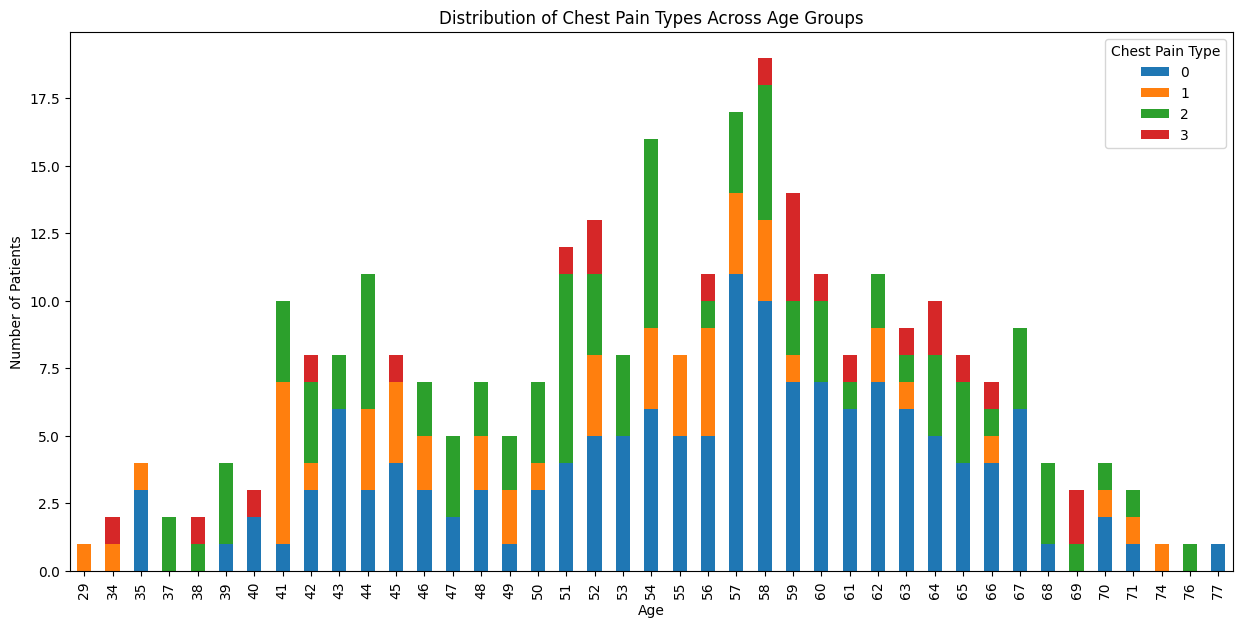

In [30]:
# Visualize the distribution of chest pain types across different age groups
df.groupby('age')['cp'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Distribution of Chest Pain Types Across Age Groups')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.legend(title='Chest Pain Type')
plt.show()

3. How does maximum heart rate vary with exercise-induced angina?


In [31]:
# Compare maximum heart rates for patients with and without exercise-induced angina
thalach_by_exang = df.groupby('exang')['thalach'].mean()
print("Average maximum heart rate by exercise-induced angina (0: No, 1: Yes):")
print(thalach_by_exang)

Average maximum heart rate by exercise-induced angina (0: No, 1: Yes):
exang
0    155.596059
1    137.212121
Name: thalach, dtype: float64


4. Is there a significant difference in resting blood pressure between male and female patients?


In [32]:
# Calculate the average resting blood pressure for each gender
average_trestbps_by_sex = df.groupby('sex')['trestbps'].mean()
print("Average resting blood pressure by sex (0: Female, 1: Male):")
print(average_trestbps_by_sex)

Average resting blood pressure by sex (0: Female, 1: Male):
sex
0    133.083333
1    130.912621
Name: trestbps, dtype: float64


5. What is the relationship between fasting blood sugar levels and the presence of heart disease?


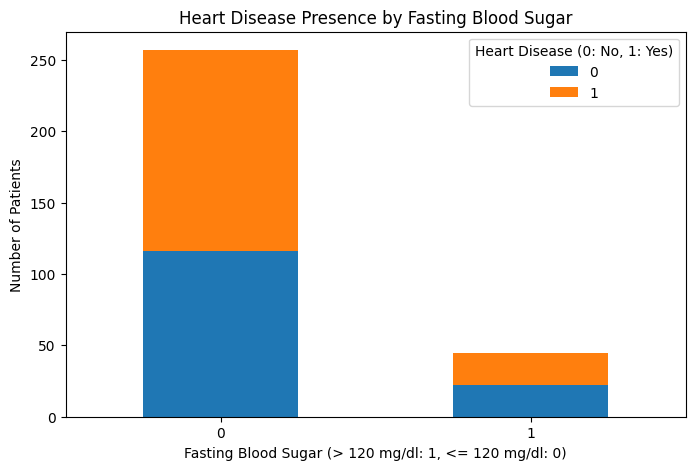

In [33]:
# Visualize the relationship between fasting blood sugar and target
pd.crosstab(df['fbs'], df['target']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Heart Disease Presence by Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (> 120 mg/dl: 1, <= 120 mg/dl: 0)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease (0: No, 1: Yes)')
plt.show()

6. How does the number of major vessels (ca) affect the target variable (heart disease presence)?


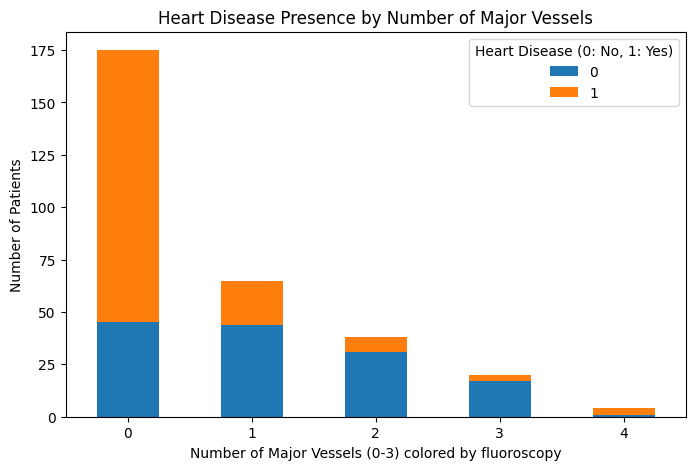

In [34]:
# Visualize the relationship between the number of major vessels and target
pd.crosstab(df['ca'], df['target']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Heart Disease Presence by Number of Major Vessels')
plt.xlabel('Number of Major Vessels (0-3) colored by fluoroscopy')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease (0: No, 1: Yes)')
plt.show()

7. What is the average oldpeak value for patients with different types of chest pain?


In [35]:
# Find the average oldpeak values for each chest pain type
average_oldpeak_by_cp = df.groupby('cp')['oldpeak'].mean()
print("Average oldpeak value by chest pain type:")
print(average_oldpeak_by_cp)

Average oldpeak value by chest pain type:
cp
0    1.383217
1    0.316000
2    0.806977
3    1.391304
Name: oldpeak, dtype: float64


8. Analyze the distribution of thalassemia types (thal) among patients with heart disease.


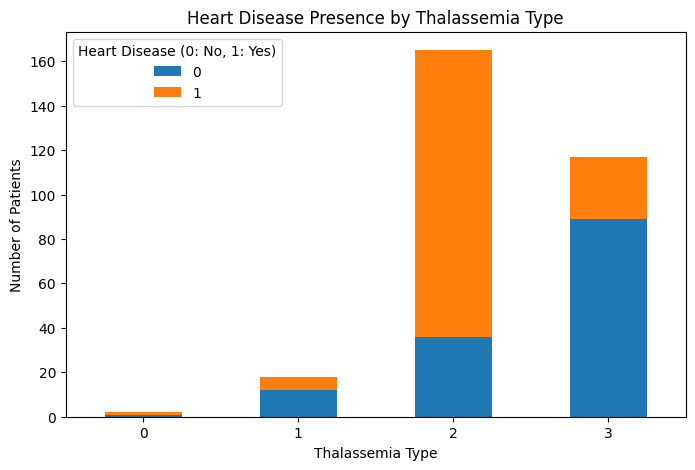

In [36]:
# Visualize the distribution of thalassemia types among patients with heart disease
pd.crosstab(df['thal'], df['target']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Heart Disease Presence by Thalassemia Type')
plt.xlabel('Thalassemia Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease (0: No, 1: Yes)')
plt.show()

9. What are the most common combinations of risk factors in patients with heart disease?


In [37]:
# Find the most common combinations of risk factors in patients with heart disease
# Focusing on 'cp', 'fbs', 'exang', 'thal' as suggested
risk_factor_combinations = df[df['target'] == 1].groupby(['cp', 'fbs', 'exang', 'thal']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
print("Most common combinations of risk factors in patients with heart disease:")
display(risk_factor_combinations.head()) # Display the top combinations

Most common combinations of risk factors in patients with heart disease:


,cp,fbs,exang,thal,counts
15,2,0,0,2,41
8,1,0,0,2,30
1,0,0,0,2,23
19,2,1,0,2,10
4,0,0,1,2,6


10. Perform a pairwise comparison of clinical measurements for patients with and without heart disease.


In [38]:
# Get descriptive statistics for patients with and without heart disease
heart_disease_present = df[df['target'] == 1].describe().T
heart_disease_absent = df[df['target'] == 0].describe().T

print("Descriptive statistics for patients with heart disease:")
display(heart_disease_present)

print("\nDescriptive statistics for patients without heart disease:")
display(heart_disease_absent)

# Optional: Visualize pairwise comparisons for key features (similar to original suggestion but for target groups)
# sns.pairplot(df, hue='target', vars=['age', 'chol', 'trestbps', 'thalach', 'oldpeak'])
# plt.suptitle('Pairwise Comparison of Clinical Measurements by Heart Disease Presence', y=1.02)
# plt.show()

Descriptive statistics for patients with heart disease:


,count,mean,std,min,25%,50%,75%,max
age,164.0,52.585366,9.511957,29.0,44.75,52.0,59.000,76.0
sex,164.0,0.560976,0.497788,0.0,0.00,1.0,1.000,1.0
cp,164.0,1.371951,0.953878,0.0,1.00,2.0,2.000,3.0
trestbps,164.0,129.250000,16.204739,94.0,120.00,130.0,140.000,180.0
chol,164.0,242.640244,53.456580,126.0,208.75,234.5,267.250,564.0
fbs,164.0,0.140244,0.348303,0.0,0.00,0.0,0.000,1.0
restecg,164.0,0.591463,0.505358,0.0,0.00,1.0,1.000,2.0
thalach,164.0,158.378049,19.199080,96.0,148.75,161.0,172.000,202.0
exang,164.0,0.140244,0.348303,0.0,0.00,0.0,0.000,1.0
oldpeak,164.0,0.586585,0.781734,0.0,0.00,0.2,1.025,4.2



Descriptive statistics for patients without heart disease:


,count,mean,std,min,25%,50%,75%,max
age,138.0,56.601449,7.962082,35.0,52.00,58.0,62.00,77.0
sex,138.0,0.826087,0.380416,0.0,1.00,1.0,1.00,1.0
cp,138.0,0.478261,0.905920,0.0,0.00,0.0,0.00,3.0
trestbps,138.0,134.398551,18.729944,100.0,120.00,130.0,144.75,200.0
chol,138.0,251.086957,49.454614,131.0,217.25,249.0,283.00,409.0
fbs,138.0,0.159420,0.367401,0.0,0.00,0.0,0.00,1.0
restecg,138.0,0.449275,0.541321,0.0,0.00,0.0,1.00,2.0
thalach,138.0,139.101449,22.598782,71.0,125.00,142.0,156.00,195.0
exang,138.0,0.550725,0.499232,0.0,0.00,1.0,1.00,1.0
oldpeak,138.0,1.585507,1.300340,0.0,0.60,1.4,2.50,6.2


1. What is the effect of combining multiple risk factors (age, cholesterol, blood pressure) on the likelihood of heart disease?


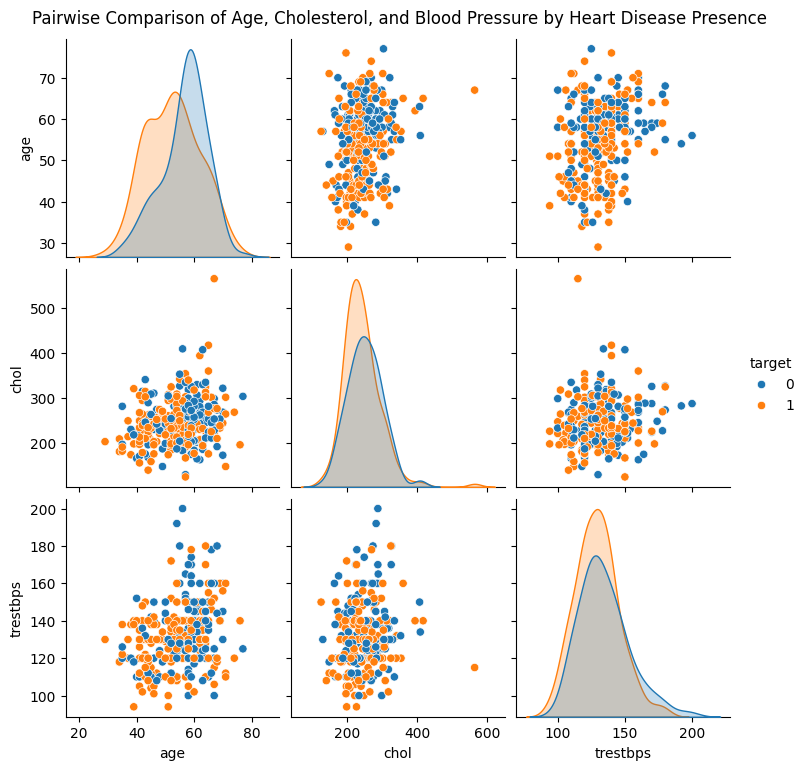

In [39]:
# Visualize the interactions between age, cholesterol, and blood pressure, colored by the target variable
relevant_columns = df[['age', 'chol', 'trestbps', 'target']]
sns.pairplot(relevant_columns, hue='target')
plt.suptitle('Pairwise Comparison of Age, Cholesterol, and Blood Pressure by Heart Disease Presence', y=1.02)
plt.show()

2. Which clinical measurement has the strongest correlation with heart disease presence?


In [40]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find the correlation of all features with the 'target' variable
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

print("Correlation with Heart Disease Presence:")
display(target_correlation)

Correlation with Heart Disease Presence:


,target
target,1.000000
cp,0.432080
thalach,0.419955
slope,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trestbps,-0.146269
age,-0.221476
sex,-0.283609


**OUTLIER ANALYSIS**

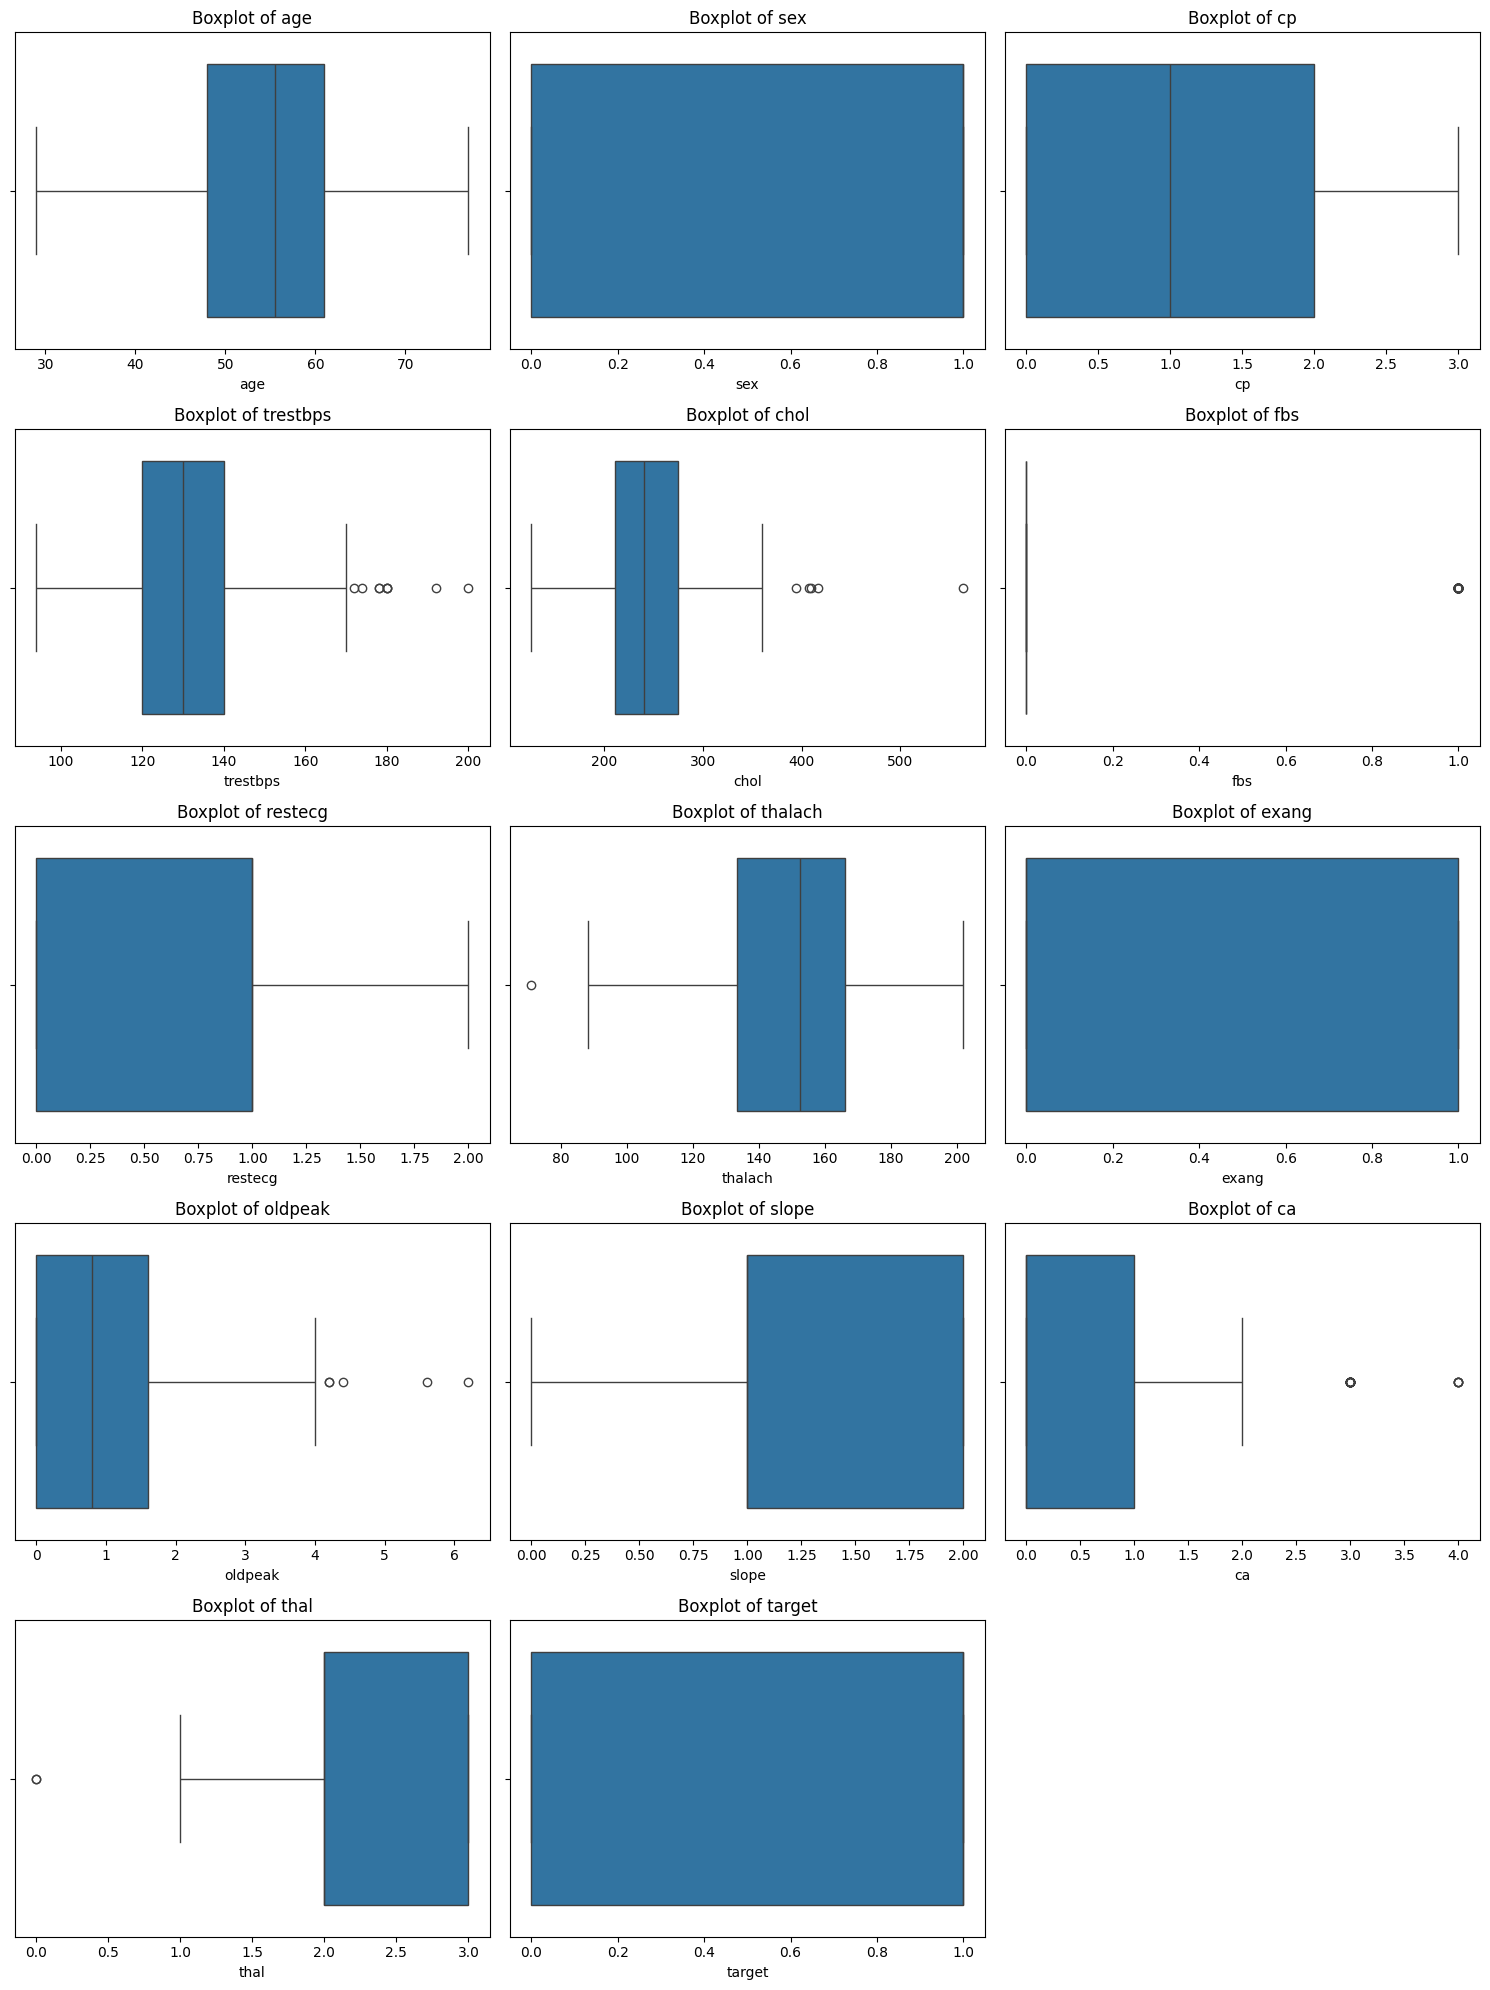

In [41]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
# only numerical data
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# capping of each column
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Winsorization: clip values to lower/upper limit
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

print("Outliers handled with Winsorization using IQR:")
print(df.head())

Outliers handled with Winsorization using IQR:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  52.0  1.0  0.0     125.0  212.0  0.0      1.0    168.0    0.0      1.0   
1  53.0  1.0  0.0     140.0  203.0  0.0      0.0    155.0    1.0      3.1   
2  70.0  1.0  0.0     145.0  174.0  0.0      1.0    125.0    1.0      2.6   
3  61.0  1.0  0.0     148.0  203.0  0.0      1.0    161.0    0.0      0.0   
4  62.0  0.0  0.0     138.0  294.0  0.0      1.0    106.0    0.0      1.9   

   slope   ca  thal  target  
0    2.0  2.0   3.0     0.0  
1    0.0  0.0   3.0     0.0  
2    0.0  0.0   3.0     0.0  
3    2.0  1.0   3.0     0.0  
4    1.0  2.5   2.0     0.0  


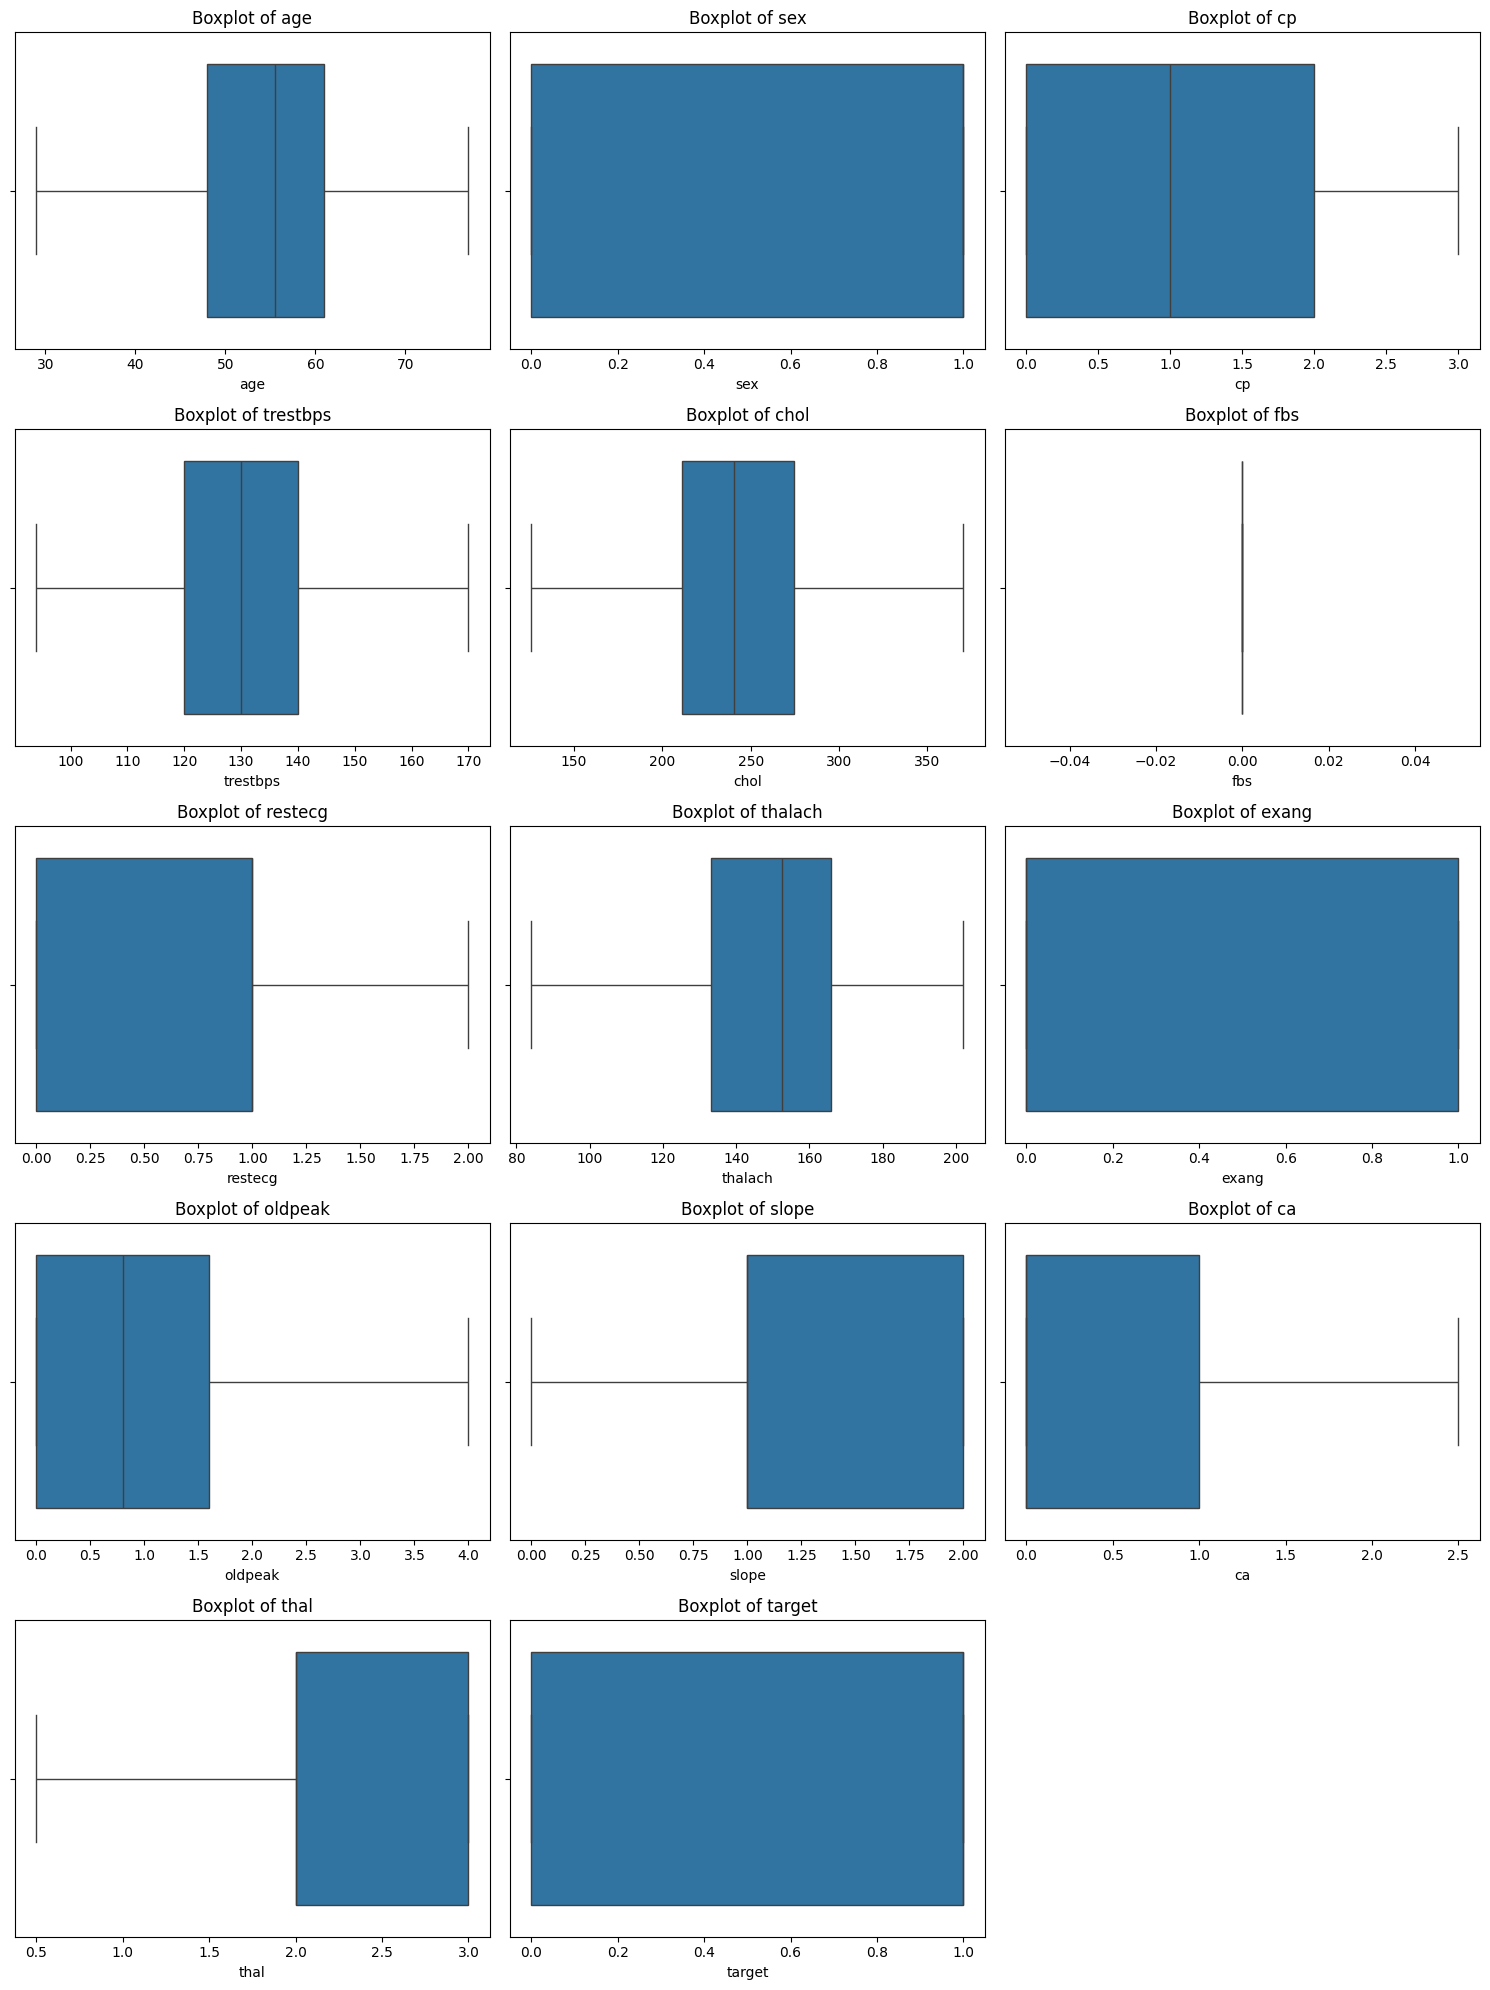

In [43]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False)

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**MODEL TRAINING AND FURTHER ANALYSIS**


3. Perform a logistic regression analysis to predict the presence of heart disease using all available features.


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.82

Confusion Matrix:
[[24  8]
 [ 3 26]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81        32
         1.0       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



4. How do the values of the slope of the peak exercise ST segment (slope) vary with different chest pain types?


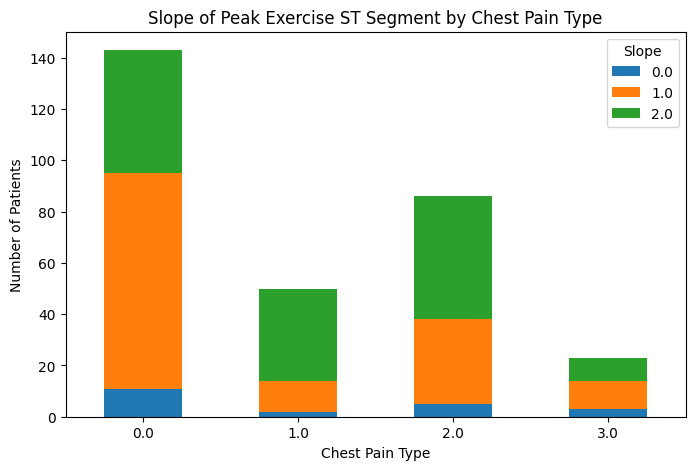

In [45]:
# Visualize the variation of slope with different chest pain types
pd.crosstab(df['cp'], df['slope']).plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Slope of Peak Exercise ST Segment by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='Slope')
plt.show()

**5. Analyze the survival rates of patients with different thalassemia types over a period.**


*Note: This dataset does not contain information about survival rates over time. Therefore, a direct analysis of survival rates with thalassemia types over a period is not possible with the current data.

However, we can analyze the distribution of thalassemia types among patients with and without heart disease to understand the relationship between thalassemia and heart disease presence. (This was already done in Medium Level Question 8).*